In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_excel('Data.xlsx')
df.set_index("Date", inplace = True)
df = df.iloc[:, :-1]
df.head()

Gold  Silver  Platinium   Zinc     Tin  Copper   Aluminuim  \
Date                                                                      
1960-01-01  35.27  0.9137       83.5  260.8  2180.4  715.40  511.471832   
1960-02-01  35.27  0.9137       83.5  244.9  2180.4  728.19  511.471832   
1960-03-01  35.27  0.9137       83.5  248.7  2173.8  684.94  511.471832   
1960-04-01  35.27  0.9137       83.5  254.6  2178.2  723.11  511.471832   
1960-05-01  35.27  0.9137       83.5  253.8  2162.7  684.75  511.471832   

             Lead  Nickle   Urea  Potassium Chloride  Crude_Oil  
Date                                                             
1960-01-01  206.1  1631.0  42.25                28.5       1.63  
1960-02-01  203.7  1631.0  42.25                28.5       1.63  
1960-03-01  210.3  1631.0  42.25                28.5       1.63  
1960-04-01  213.6  1631.0  42.25                28.5       1.63  
1960-05-01  213.4  1631.0  42.25                28.5       1.63

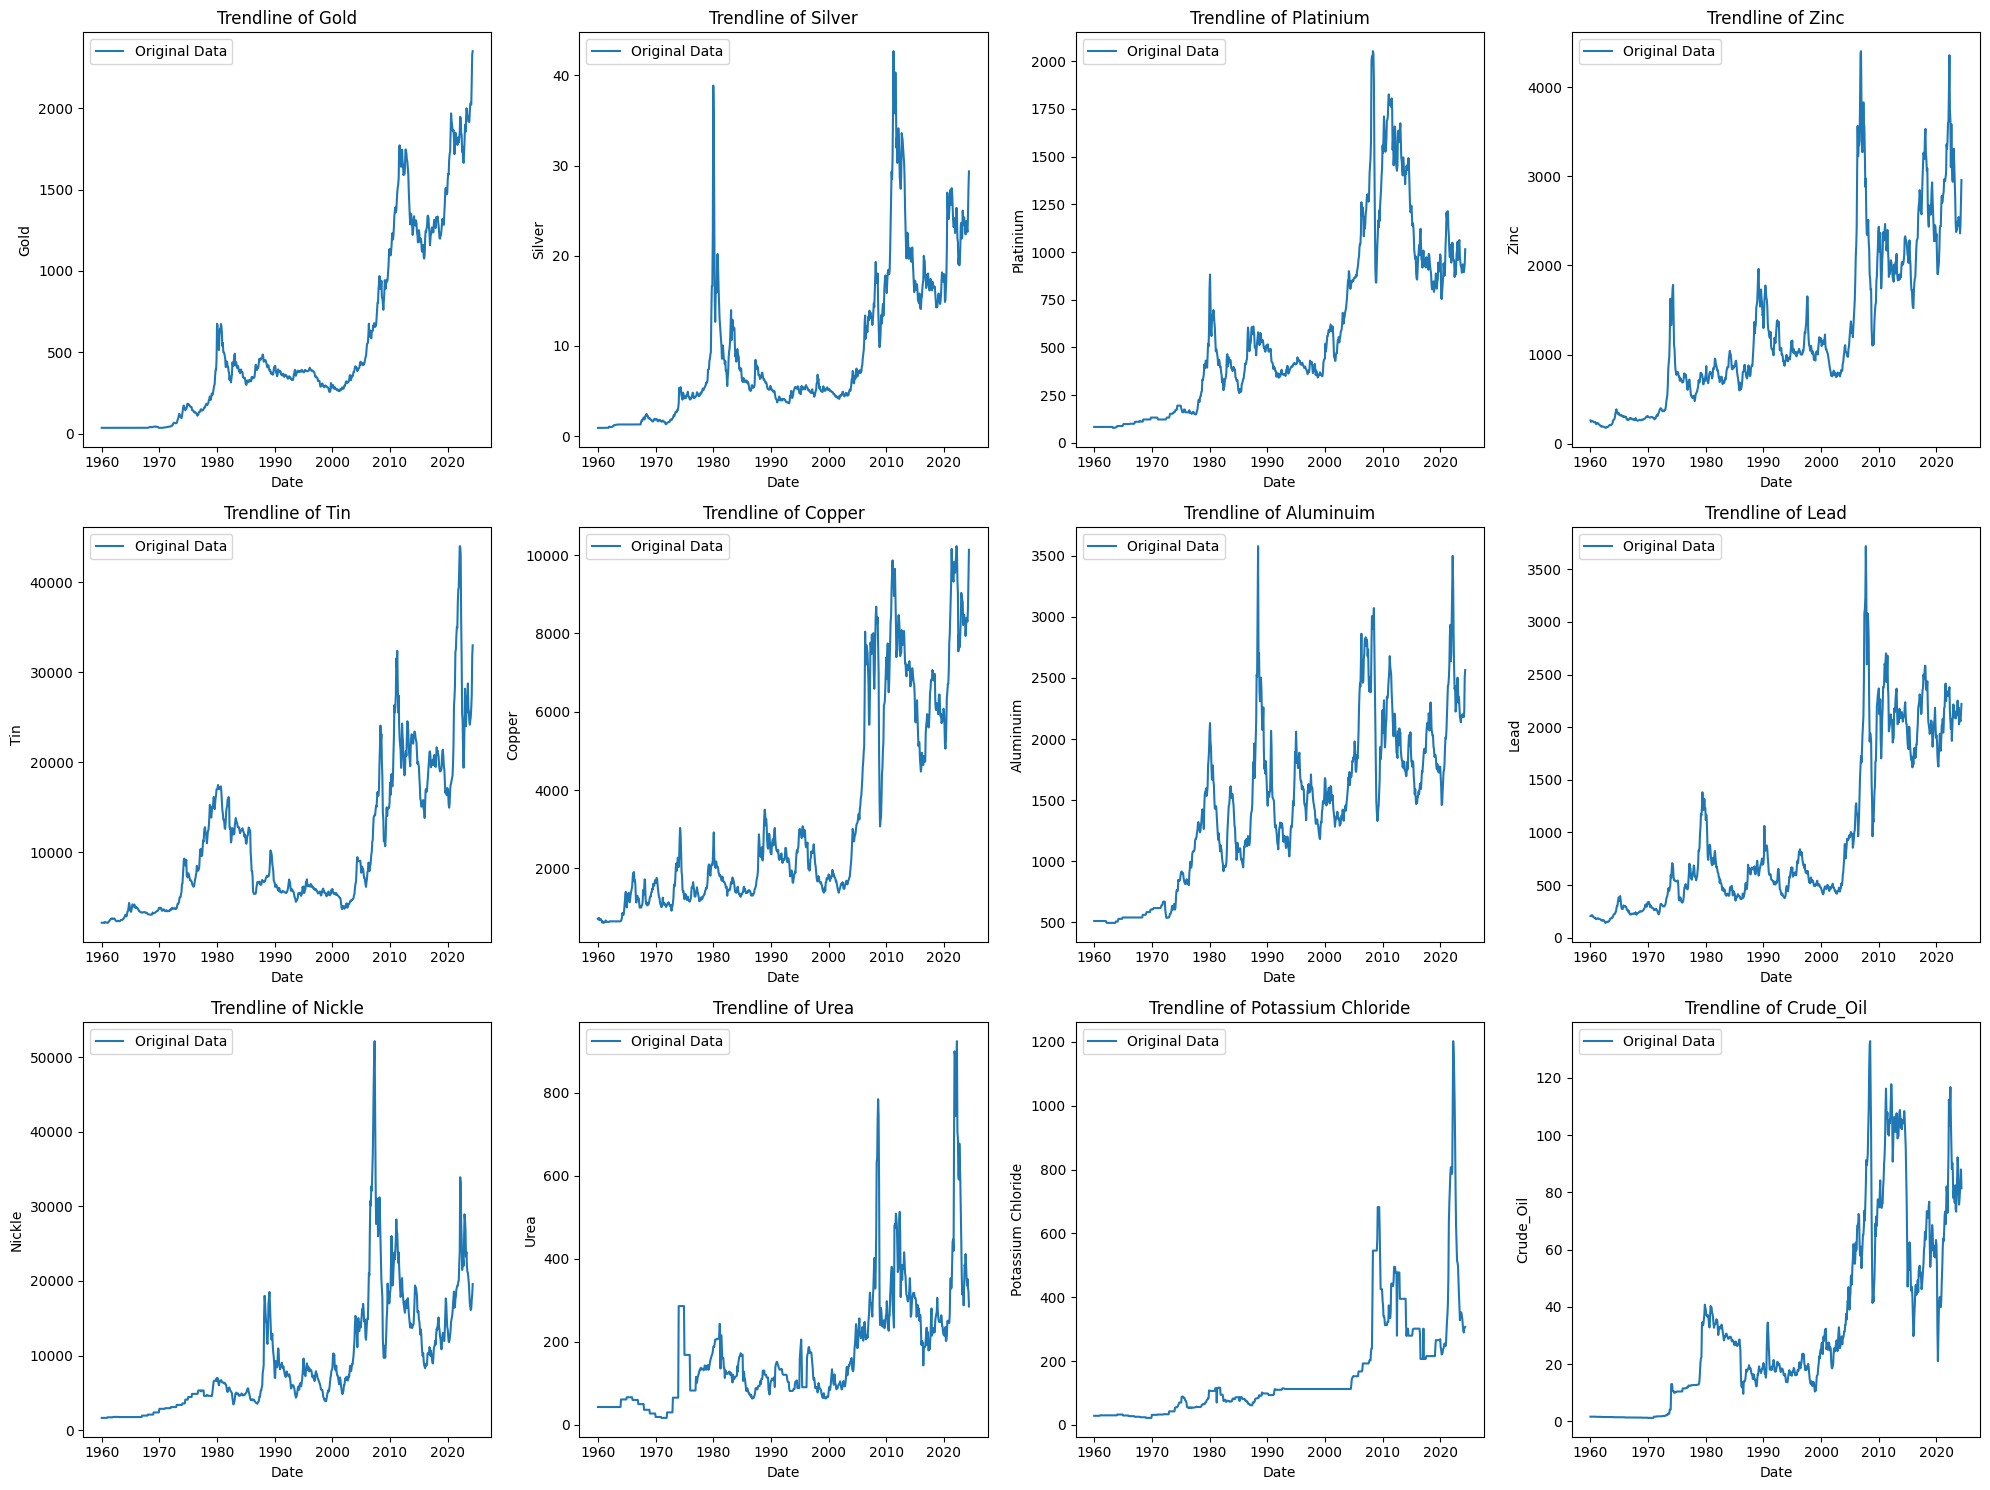

In [98]:
num_column = len(df.columns)
num_row_per_plot = 4
num_row = (num_column + num_row_per_plot - 1) // num_row_per_plot
fig, axes = plt.subplots(num_row, num_row_per_plot, figsize=(20, num_row * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.lineplot(ax=axes[i], x=df.index, y = df[column], label='Original Data')
    axes[i].set_title(f'Trendline of {column}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [99]:
# Returns 
df_pct = df.pct_change()
df_pct = df_pct.dropna()
df_pct.head()

Gold  Silver  Platinium      Zinc       Tin    Copper  Aluminuim  \
Date                                                                           
1960-02-01   0.0     0.0        0.0 -0.060966  0.000000  0.017878        0.0   
1960-03-01   0.0     0.0        0.0  0.015517 -0.003027 -0.059394        0.0   
1960-04-01   0.0     0.0        0.0  0.023723  0.002024  0.055728        0.0   
1960-05-01   0.0     0.0        0.0 -0.003142 -0.007116 -0.053049        0.0   
1960-06-01   0.0     0.0        0.0 -0.015760  0.010219  0.009989        0.0   

                Lead  Nickle  Urea  Potassium Chloride  Crude_Oil  
Date                                                               
1960-02-01 -0.011645     0.0   0.0                 0.0        0.0  
1960-03-01  0.032401     0.0   0.0                 0.0        0.0  
1960-04-01  0.015692     0.0   0.0                 0.0        0.0  
1960-05-01 -0.000936     0.0   0.0                 0.0        0.0  
1960-06-01 -0.051546     0.0   0.0                 0.0        0.0

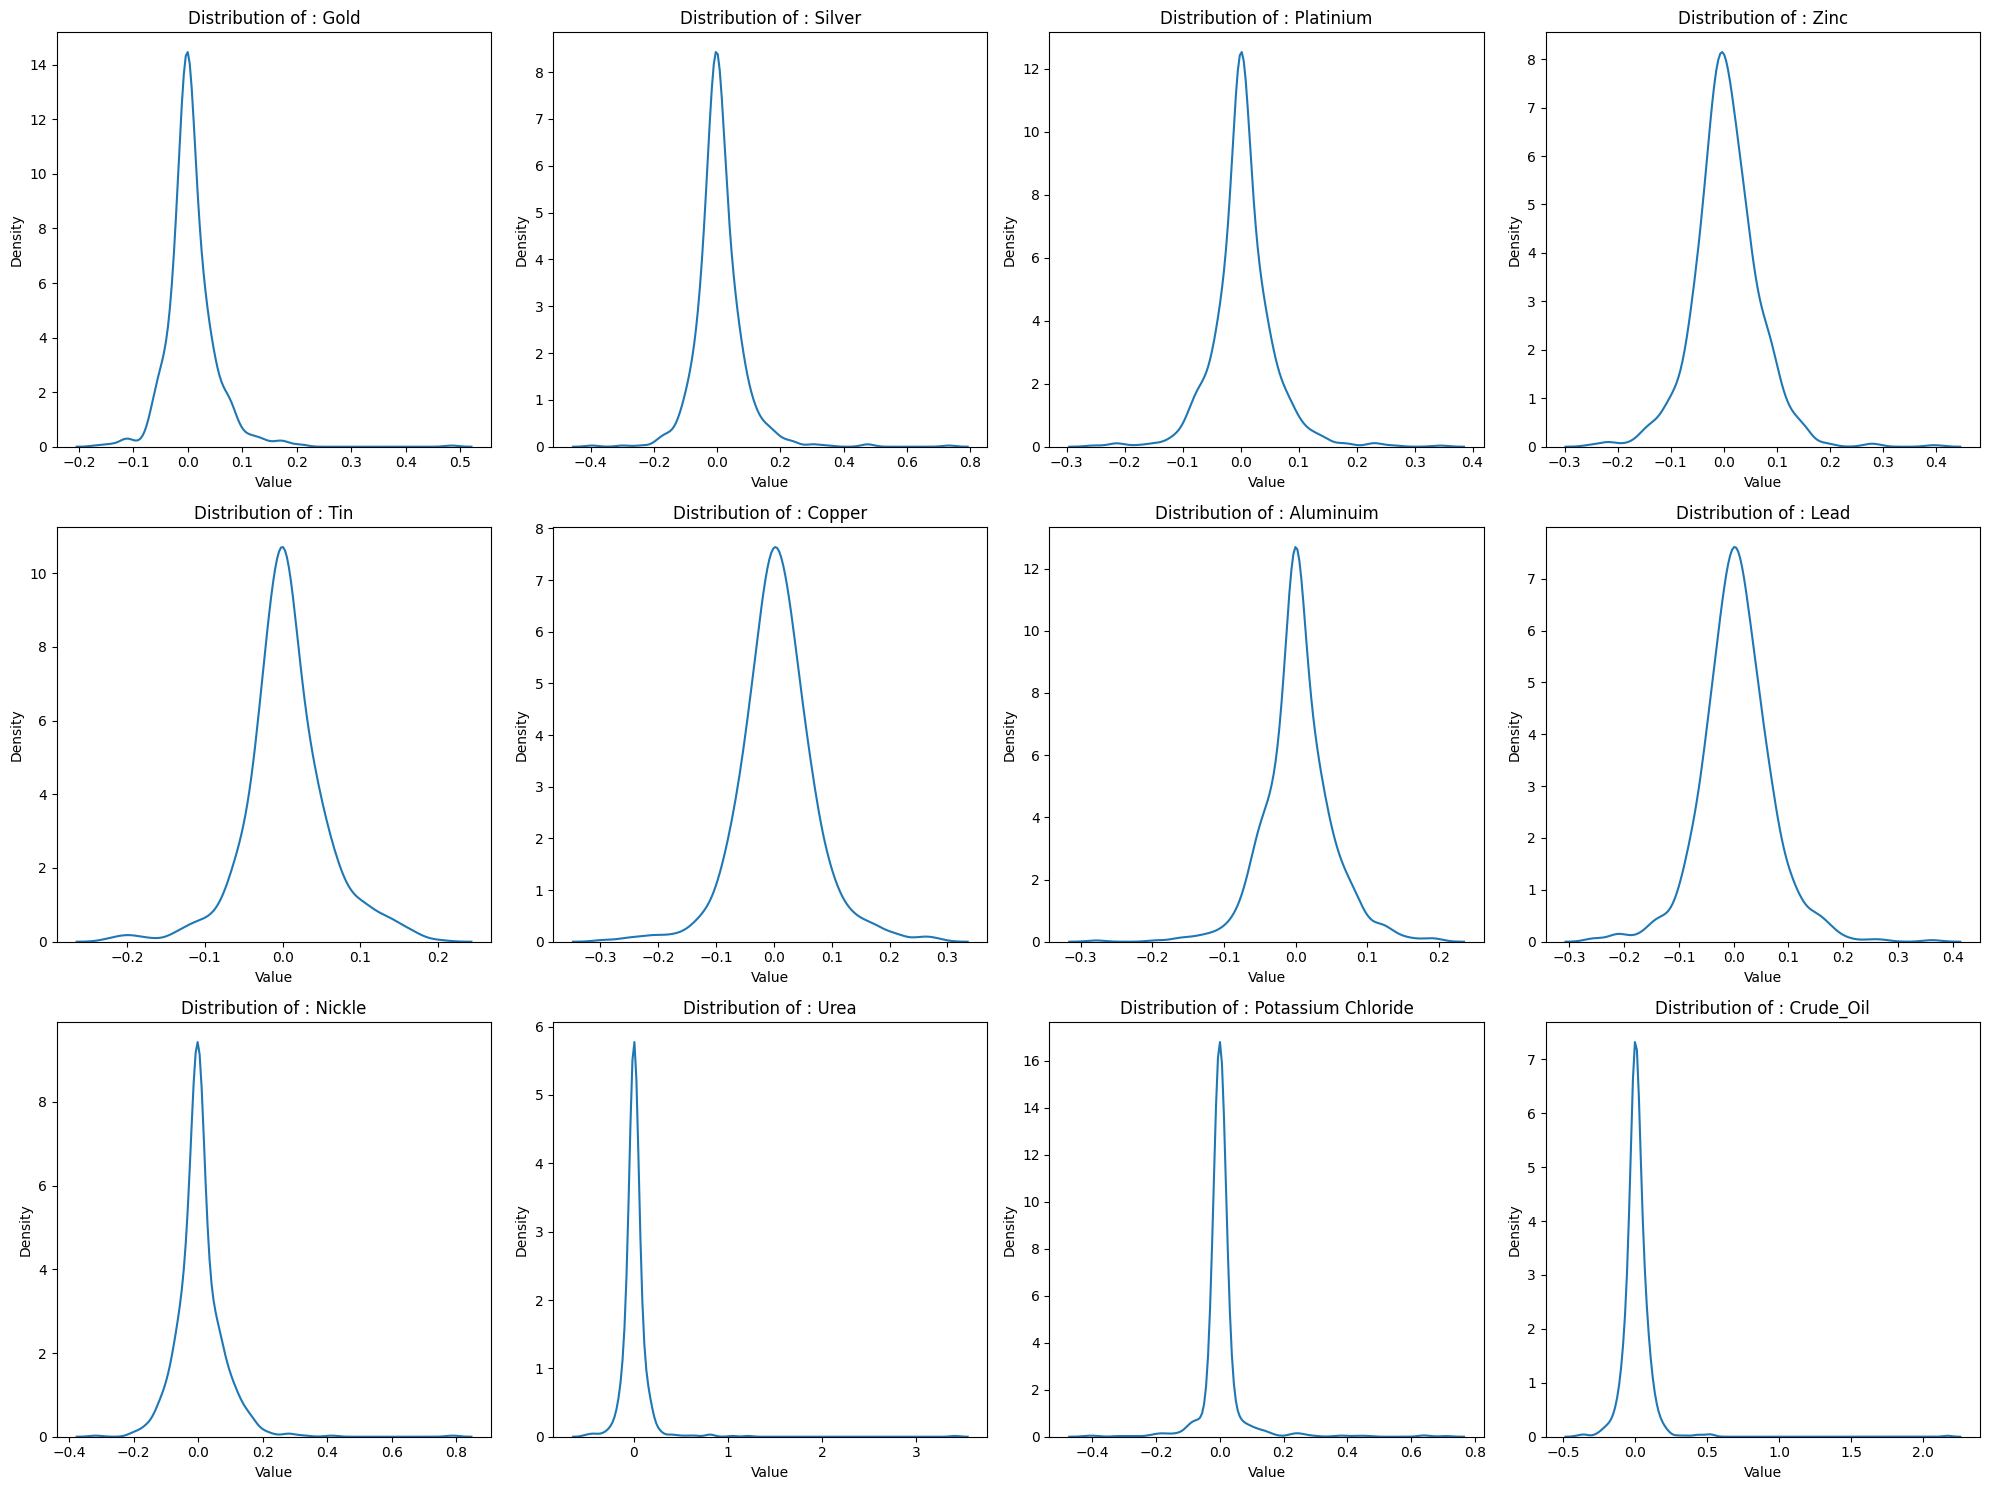

In [100]:
fig, axes = plt.subplots(num_row, num_row_per_plot, figsize=(20, num_row * 5))
axes = axes.flatten()
for i, column in enumerate(df_pct.columns):
    sns.kdeplot(df_pct[column], ax=axes[i])
    axes[i].set_title(f'Distribution of : {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    
plt.tight_layout()
plt.show()

From 1960 to 2024, the return distributions of various commodities exhibit significant variability, reflecting the diverse economic and market forces at play over the decades. The returns for Gold range from -0.2 to 0.5, indicating a relatively balanced distribution with a slight positive skew. Silver shows a wider range, with returns between -0.8 and 0.4, suggesting higher volatility. Platinum and Lead both display returns ranging from 0.3 to 0.4, indicating a consistent, positive performance.

Zinc and Copper exhibit similar patterns, with return ranges of -0.3 to 0.4 and -0.3 to 0.3, respectively, pointing to moderate variability with a slight positive bias. Tin and Aluminium have narrower ranges, from -0.2 to 0.2 and -0.3 to 0.2, respectively, showing relatively stable returns over time. Crude Oil stands out with a much broader range of returns, from -0.5 to 2.0, highlighting its higher risk and potential for large gains or losses.

For $x \geq 0$: $Y(\lambda) = \frac{(x + 1)^\lambda - 1}{\lambda}$, if $\lambda \neq 0$

$Y(\lambda) = \log(x + 1)$, if $\lambda = 0$

For $x < 0$: $Y(\lambda) = -\frac{(-x + 1)^{2-\lambda} - 1}{2 - \lambda}$, if $\lambda \neq 2$

$Y(\lambda) = -\log(-x + 1)$, if $\lambda = 2$


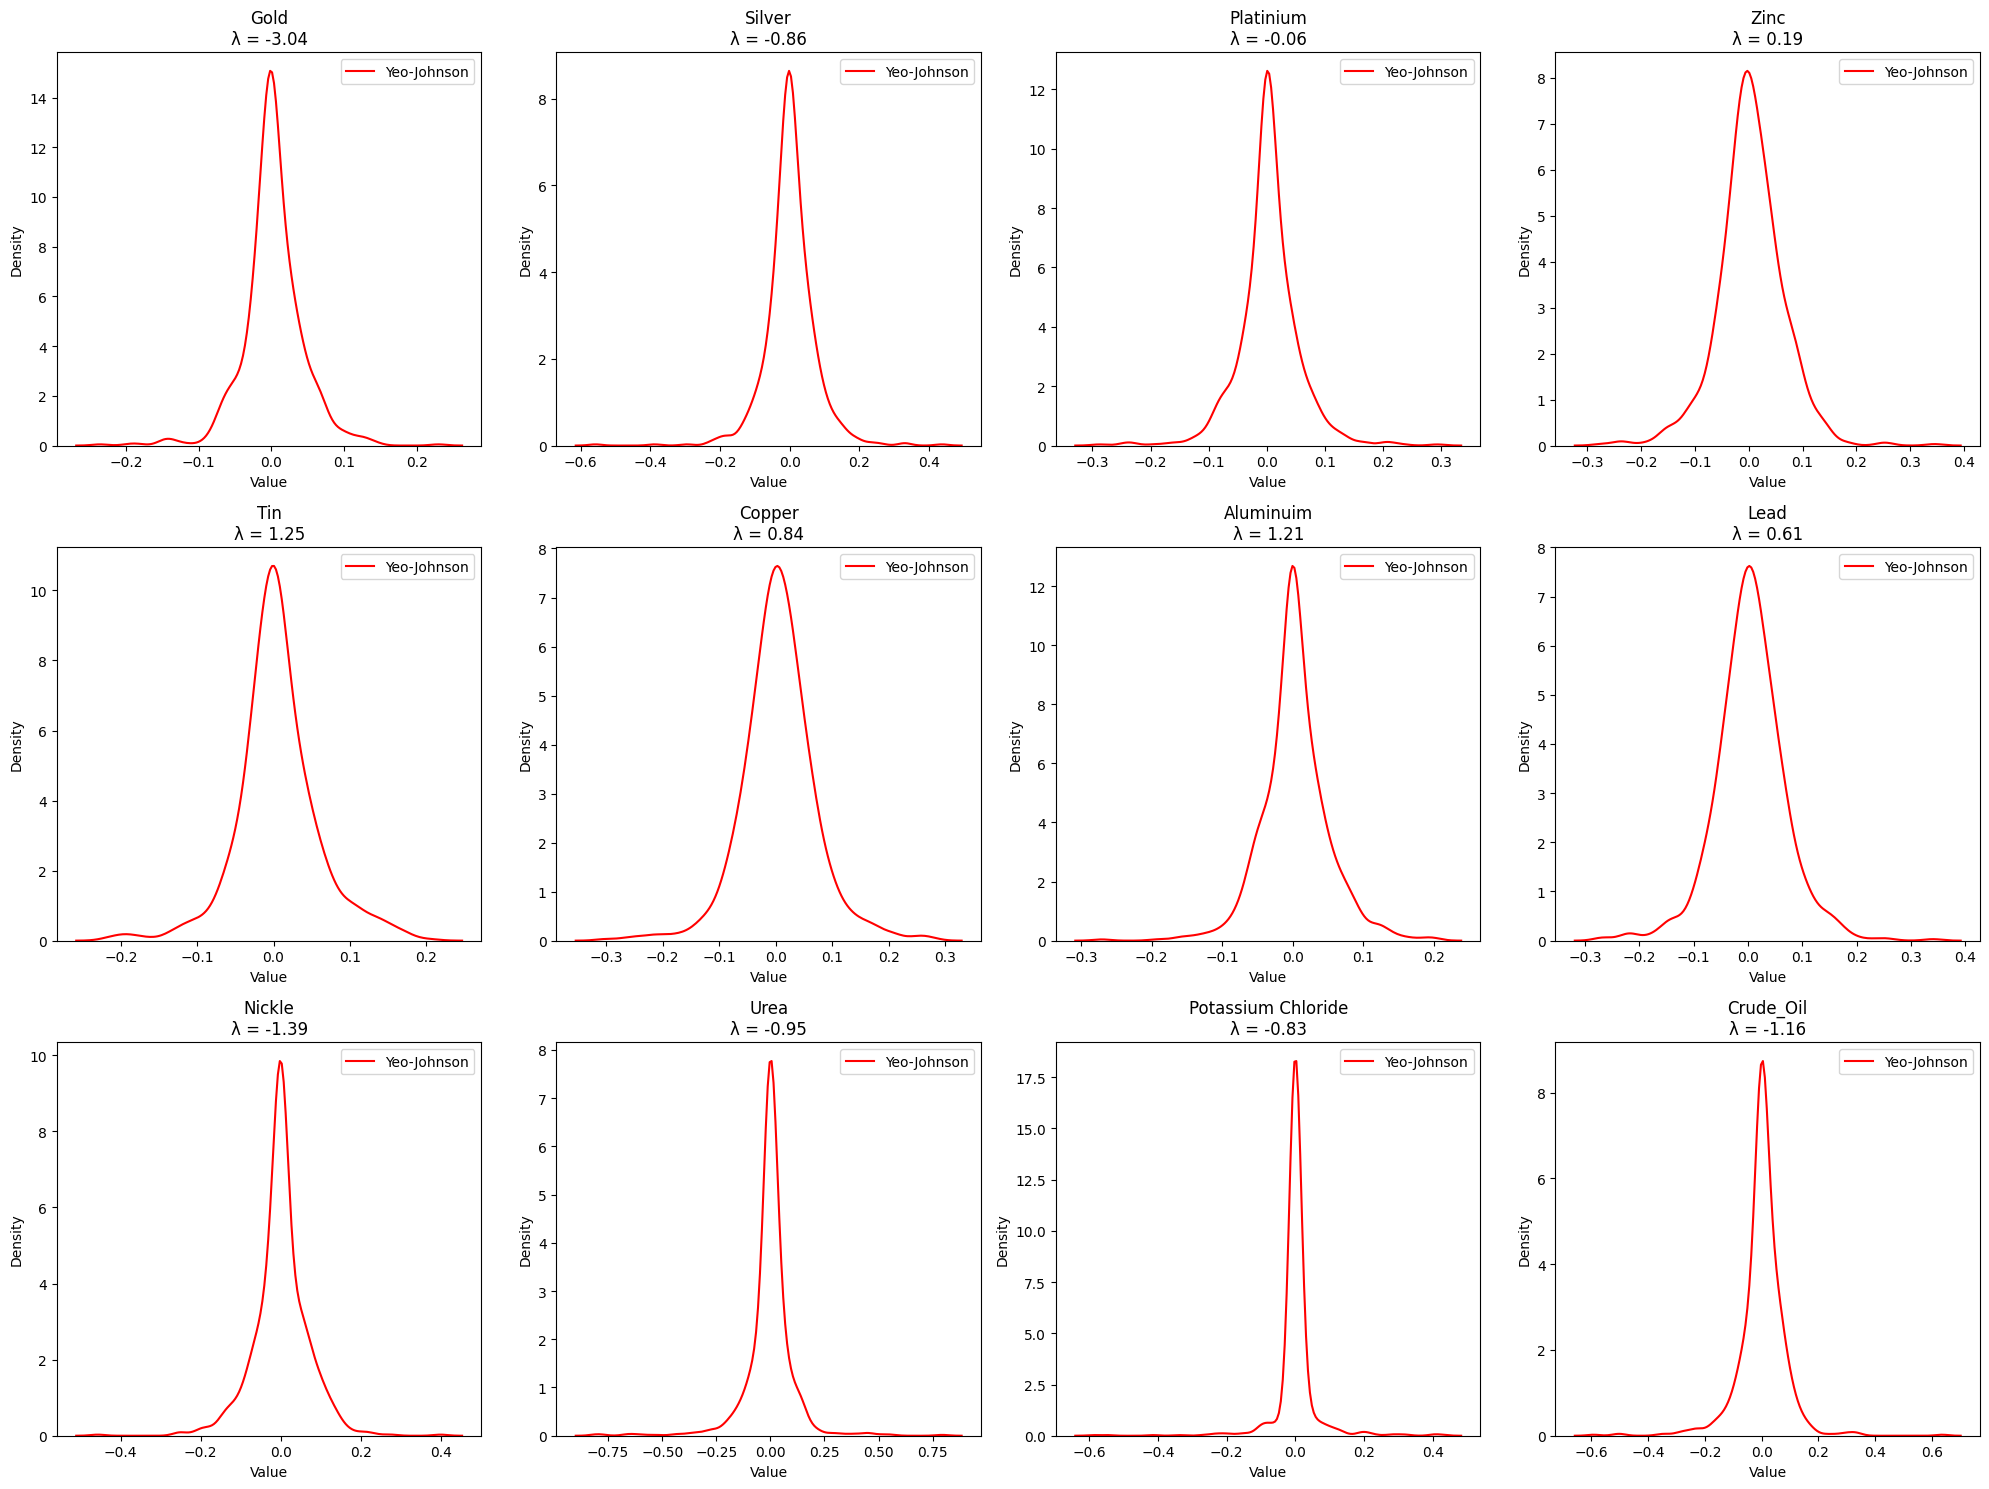

In [101]:
# Yeo-Johnson Transformation - To make distribution normal
from scipy import stats

fig, axes = plt.subplots(num_row, num_row_per_plot, figsize=(20, num_row * 5))
axes = axes.flatten()

for i, column in enumerate(df_pct.columns):
    transformed_data, lambda_param = stats.yeojohnson(df_pct[column])
    sns.kdeplot(transformed_data, ax=axes[i], color='red', label='Yeo-Johnson')
    axes[i].set_title(f'{column}\nλ = {lambda_param:.2f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()
plt.tight_layout()
plt.show()

In [102]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(df_pct)
df = pd.DataFrame(transformed_data, index = df_pct.index, columns=df_pct.columns)
df.head()

Gold    Silver  Platinium      Zinc       Tin    Copper  \
Date                                                                      
1960-02-01 -0.066527 -0.034803  -0.061613 -1.079917 -0.099402  0.191660   
1960-03-01 -0.066527 -0.034803  -0.061613  0.194032 -0.156136 -0.989402   
1960-04-01 -0.066527 -0.034803  -0.061613  0.326161 -0.061440  0.764931   
1960-05-01 -0.066527 -0.034803  -0.061613 -0.109628 -0.232708 -0.891881   
1960-06-01 -0.066527 -0.034803  -0.061613 -0.317593  0.092448  0.071742   

            Aluminuim      Lead    Nickle      Urea  Potassium Chloride  \
Date                                                                      
1960-02-01  -0.072824 -0.249257 -0.001859  0.026838           -0.024143   
1960-03-01  -0.072824  0.431340 -0.001859  0.026838           -0.024143   
1960-04-01  -0.072824  0.174496 -0.001859  0.026838           -0.024143   
1960-05-01  -0.072824 -0.082732 -0.001859  0.026838           -0.024143   
1960-06-01  -0.072824 -0.875719 -0.001859  0.026838           -0.024143   

            Crude_Oil  
Date                   
1960-02-01  -0.014715  
1960-03-01  -0.014715  
1960-04-01  -0.014715  
1960-05-01  -0.014715  
1960-06-01  -0.014715

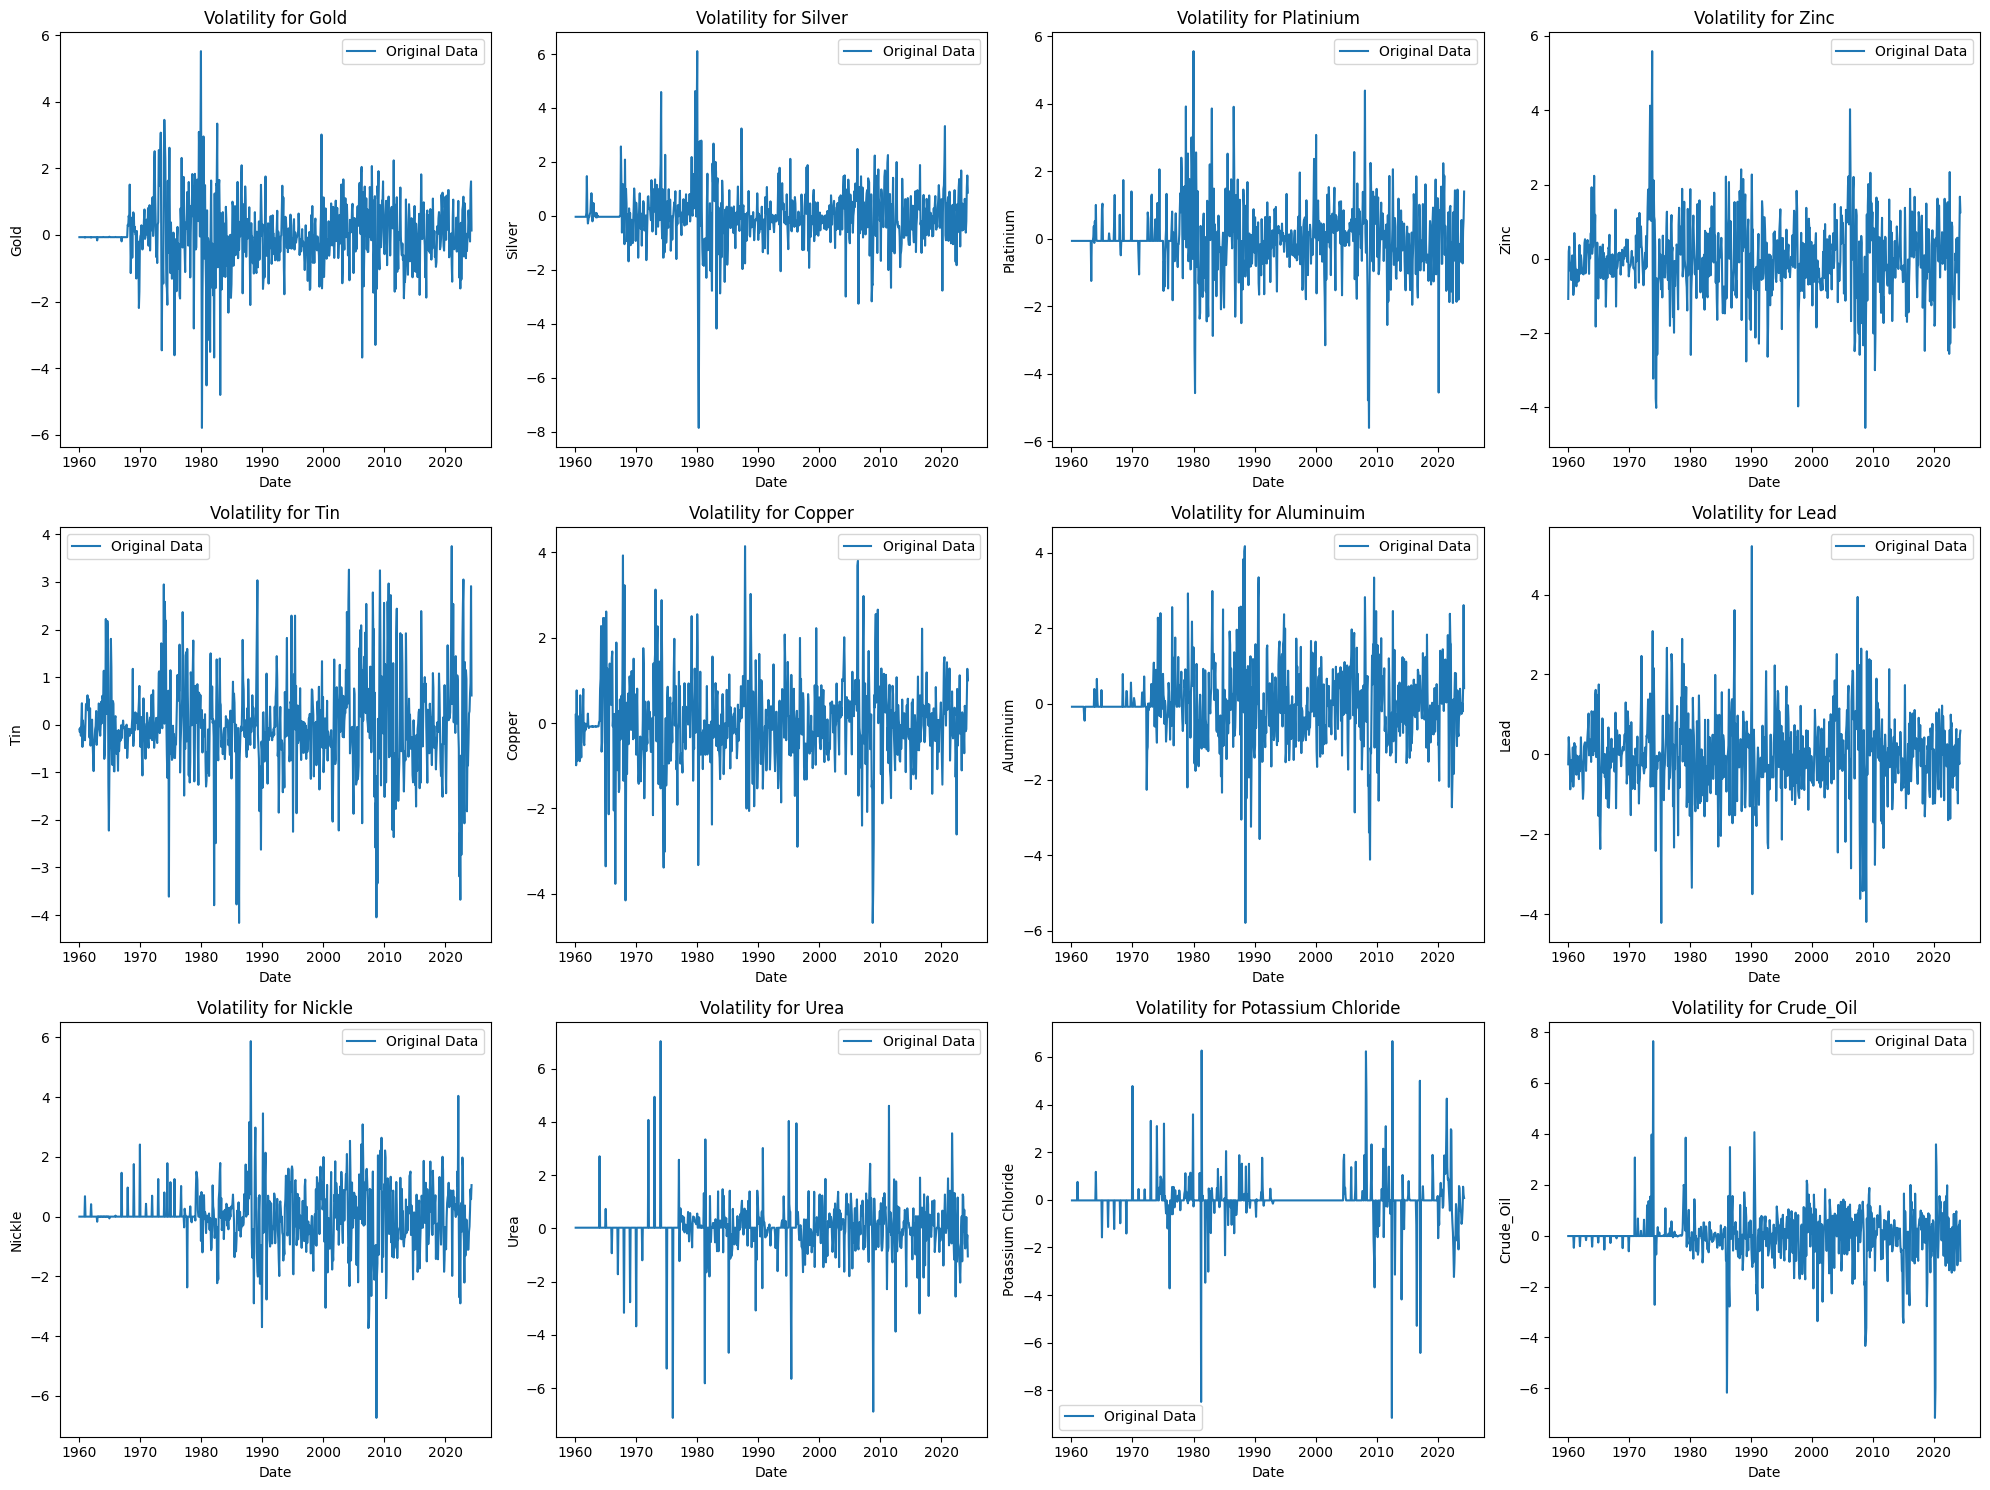

In [103]:
fig, axes = plt.subplots(num_row, num_row_per_plot, figsize=(20, num_row * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.lineplot(ax=axes[i], x=df.index, y=df[column], label='Original Data')
    axes[i].set_title(f'Volatility for {column}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

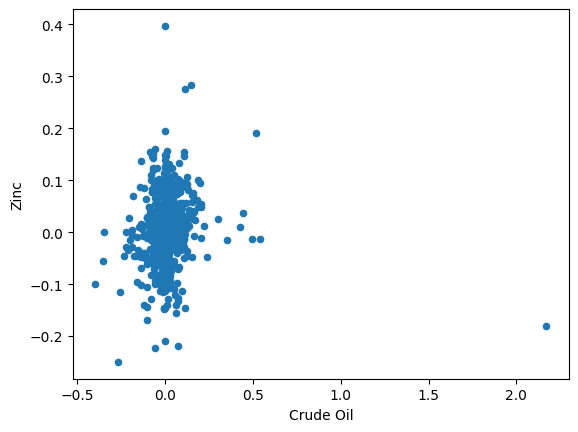

In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

scatt = df_pct.plot.scatter(x='Crude_Oil', y='Zinc')
scatt.set(xlabel='Crude Oil', ylabel='Zinc')
plt.show()

In [ ]:
# fig, axes = plt.subplots(num_row, num_row_per_plot, figsize=(20, num_row * 5))
# axes = axes.flatten()

# for i, column in enumerate(df.columns):
#     scatt = df.plot.scatter(x='Crude Oil', y=column, ax=axes[i])
#     axes[i].set_xlabel('Crude Oil')
#     axes[i].set_ylabel(column)
# plt.show()

In [106]:
# OLS regression result

model_1 = smf.ols("Crude_Oil ~ Zinc", data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Crude_Oil   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     16.93
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           4.29e-05
Time:                        21:14:31   Log-Likelihood:                -1087.0
No. Observations:                 772   AIC:                             2178.
Df Residuals:                     770   BIC:                             2187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.469e-17      0.036  -9.73e-16      1.000      -0.070       0.070
Zinc           0.1467      0.036      4.115      0.000       0.077       0.217
==============================================================================
Omnibus:                      198.496   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6035.214
Skew:                          -0.461   Prob(JB):                         0.00
Kurtosis:                      16.666   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared (R²):** 0.022  
This value indicates that only 2.2% of the variance in the dependent variable (Crude Oil) is explained by the independent variable (Zinc). It suggests a very weak relationship.

**Intercept:** The intercept is not statistically significant as indicated by its very high p-value and confidence interval including zero.

**Zinc:** The coefficient for Zinc is statistically significant with a low p-value, meaning that Zinc has a significant impact on Crude Oil. For every one-unit increase in Zinc, Crude Oil is expected to increase by 0.1467 units. The confidence interval for Zinc does not include zero, reinforcing its significance.

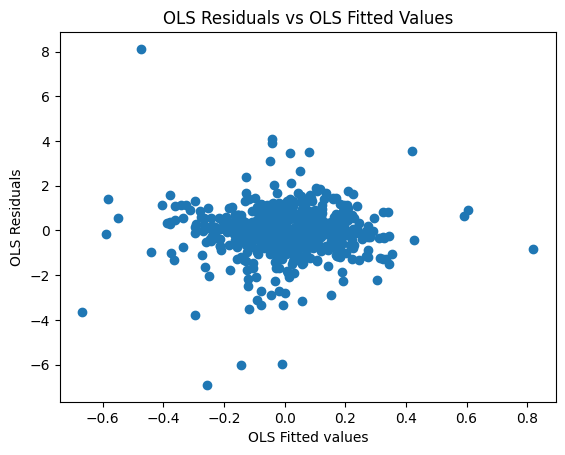

In [108]:
# scatter plot for OLS fitted models and OLS residuals

model_fitted_y = model_1.fittedvalues
model_resid_y = model_1.resid

plt.scatter(x=model_fitted_y, y=model_resid_y)
plt.title("OLS Residuals vs OLS Fitted Values")
plt.xlabel("OLS Fitted values")
plt.ylabel("OLS Residuals")
plt.show()

To determine the heteroscedasticity in a regression model we take an auxialliary regression of the squared residuals on the independent variables $\hat{\epsilon_i}^2 = \gamma_0 + \gamma_1 x_i + u_i$
Then $BP = \frac{n \cdot R^2}{2}$
n = no. of observation
and R^2 = is the coefficient of determination from the auxiliary regression.

In [112]:
# Breusch-Pagan Test - detect heteroscedasticity in a regression model
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
pd.DataFrame(test, index=name, columns=[""])

Lagrange multiplier statistic  12.968469
p-value                         0.000317
f-value                        13.155872
f p-value                       0.000306

**Breusch-Pagan Test Results:**

- **Lagrange Multiplier Statistic:** 12.968
- **p-value:** 0.000317

The small p-value indicates strong evidence of heteroscedasticity in the model. This suggests that the variance of the residuals changes with the level of the independent variable (Zinc), violating the assumption of constant variance. It strongly reject the null hypothesis (0.05).

In [118]:
df["abs_residuals"] = np.abs(model_1.resid)
df["fitted_values"] = model_1.fittedvalues

model_temp = smf.ols("abs_residuals ~ fitted_values", data=df).fit()
weights = model_temp.fittedvalues
weights = 1 / np.square(weights)
df["weights"] = weights
Y = df["Crude_Oil"].tolist()
X = df["Zinc"].tolist()
X = sm.add_constant(X)  # adding an intercept

model_WLS = sm.WLS(Y, X, df["weights"]).fit()
model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            WLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     18.49
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.93e-05
Time:                        23:03:52   Log-Likelihood:                -1067.7
No. Observations:                 772   AIC:                             2139.
Df Residuals:                     770   BIC:                             2149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.035      0.030      0.976      -0.068       0.070
x1             0.1338      0.031      4.300      0.000       0.073       0.195
==============================================================================
Omnibus:                      161.848   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2527.711
Skew:                          -0.462   Prob(JB):                         0.00
Kurtosis:                      11.816   Cond. No.                         1.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above WLS we have taken weight as the inverse of the variance of each data points

The intercept (const) is not statistically significant, meaning that when x1 is zero, the expected value of y is likely close to zero, but this estimate is not precise.
The predictor variable (x1) is statistically significant with a positive coefficient, indicating a strong and reliable positive relationship between x1 and the dependent variable y. This suggests that as x1 increases, y also increases, and this relationship is statistically meaningful.

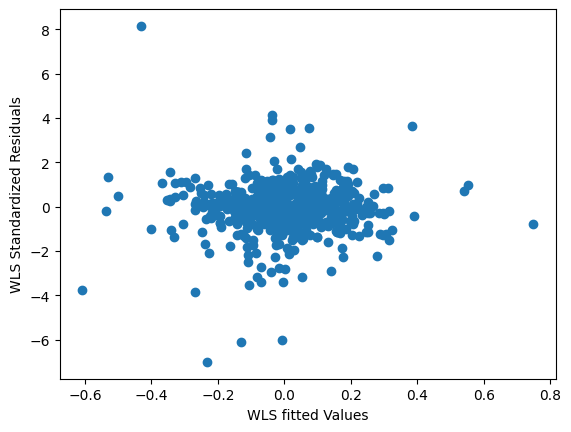

In [116]:
fitted_values_WLS = model_WLS.fittedvalues
residuals_WLS = model_WLS.resid
std_model_residWLS = residuals_WLS / residuals_WLS.std(ddof=1)
plt.scatter(fitted_values_WLS, std_model_residWLS)
plt.xlabel("WLS fitted Values")
plt.ylabel("WLS Standardized Residuals")
plt.show()